# Advanced ML: Домашнее задание 2

Это задание связано с анализом конкретного датасета, в котором, надеюсь, понадобится то, чему мы с вами до сих пор научились. Как и раньше, в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Любые комментарии, новые идеи и рассуждения на тему в этом ноутбуке категорически приветствуются. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data


## №1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).

In [420]:
!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/xfs/.wget-hsts'. HSTS will be disabled.
--2020-05-15 01:54:54--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 84.201.141.148, 2a03:b0c0:3:e0::27e:2001
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|84.201.141.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2459742 (2,3M) [text/csv]
Saving to: ‘owid-covid-data.csv.1’

owid-covid-data.csv 100%[===================>]   2,35M   429KB/s    in 5,6s    

2020-05-15 01:55:00 (427 KB/s) - ‘owid-covid-data.csv.1’ saved [2459742/2459742]



In [169]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

FIGSIZE = (12,8)

In [159]:
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])
df['new_cases'].replace(0, 1, inplace=True)
df['day'] = (df['date'] - pd.to_datetime('2020-03-02')).astype('timedelta64[D]')

full_df = df[(df['location'] == 'Russia') & (df['date'] >= '2020-03-03')]

split_idx = 50
train_df = full_df.iloc[:split_idx]
test_df = full_df.iloc[split_idx:]
train_df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k,day
13775,RUS,Russia,2020-03-03,3,1,0,0,0.021,0.007,0.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,1.0
13776,RUS,Russia,2020-03-04,4,1,0,0,0.027,0.007,0.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,2.0
13777,RUS,Russia,2020-03-05,4,1,0,0,0.027,0.000,0.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,3.0
13778,RUS,Russia,2020-03-06,4,1,0,0,0.027,0.000,0.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,4.0
13779,RUS,Russia,2020-03-07,10,6,0,0,0.069,0.041,0.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,5.0


## №2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

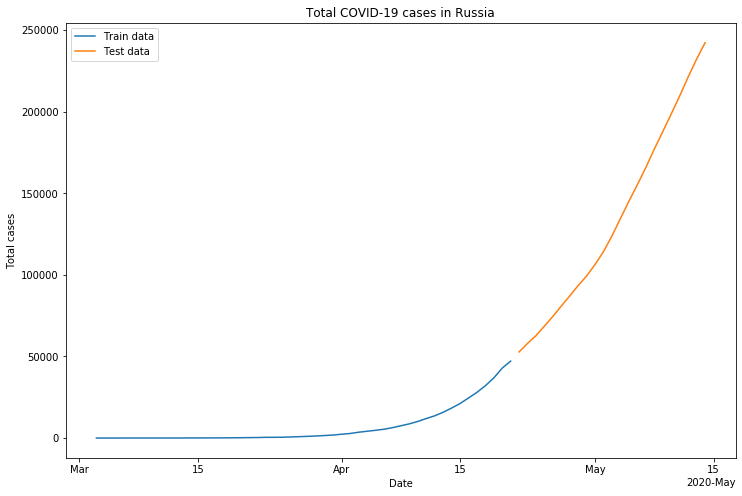

In [170]:
fig, ax = plt.subplots(figsize=FIGSIZE)

locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot('date', 'total_cases', data=train_df, label='Train data')
ax.plot('date', 'total_cases', data=test_df, label='Test data')

ax.set_xlabel('Date')
ax.set_ylabel('Total cases')
ax.legend()
ax.set_title('Total COVID-19 cases in Russia')

plt.show()

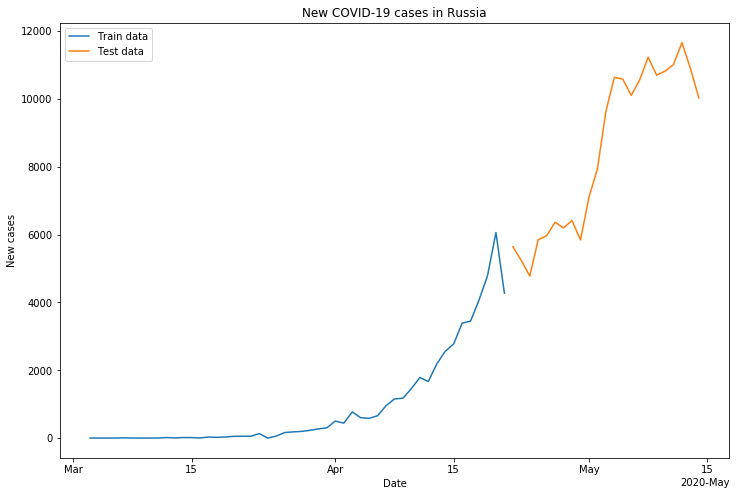

In [171]:
fig, ax = plt.subplots(figsize=FIGSIZE)

locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot('date', 'new_cases', data=train_df, label='Train data')
ax.plot('date', 'new_cases', data=test_df, label='Test data')

ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend()

ax.set_title('New COVID-19 cases in Russia')
plt.show()

### a)

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [221]:
class BayesianLinearRegression:
    def __init__(self, n_dims, mean=None, cov=None, noise_var=None):
        self.mean = np.zeros(n_dims) if mean is None else mean
        self.cov = np.eye(n_dims) if cov is None else cov
        self.noise_var = noise_var
    
    def fit(self, X, y):
        X = np.c_[np.ones((len(X), 1)), X]
        y = y.reshape(-1, 1)
        
        if self.noise_var is None:
            self.noise_var = np.var(X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)) - y)
        
        updated_cov = np.linalg.inv(np.linalg.inv(self.cov) + 1 / self.noise_var * X.T.dot(X))
        
        self.mean = updated_cov.dot(
            np.linalg.inv(self.cov).dot(self.mean.reshape(-1, 1)) + 
            1 / self.noise_var * X.T.dot(y)
        ).flatten()
        
        self.cov = updated_cov
        
    def sample_weights(self, n_samples=None):
        return sps.multivariate_normal.rvs(self.mean, self.cov, size=n_samples)

    def predict(self, X, sample_weights=False, n_samples=None):
        X = np.c_[np.ones((len(X), 1)), X]
        if not sample_weights:
            return X.dot(self.mean)
        else:
            return (
                X.dot(self.sample_weights()) if n_samples is None
                else X.dot(self.sample_weights(n_samples).T)
            )

Вместо того, чтобы обучать **y ~ exp(линейная функция от x)**, обучим $\log{y} \sim w_1 \cdot x + w_0$, а от предсказаний модели будем брать экспоненту

In [222]:
bayes_lin_reg_total_cases = BayesianLinearRegression(n_dims=2)

bayes_lin_reg_total_cases.fit(
    train_df[['day']].values,
    np.log(train_df['total_cases'].values)
)

bayes_lin_reg_new_cases = BayesianLinearRegression(n_dims=2)

bayes_lin_reg_new_cases.fit(
    train_df[['day']].values,
    np.log(train_df['new_cases'].values)
)

### b)

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [223]:
def plot_colormesh(rv, x1=-1, x2=1, y1=-1, y2=1, nx=250, ny=250):
    x = np.linspace(x1, x2, nx)
    y = np.linspace(y1, y2, ny)

    xv, yv = np.meshgrid(x, y)

    points = np.c_[xv[..., None], yv[..., None]]

    z = rv.pdf(points)
    
    plt.pcolormesh(xv, yv, z, cmap=plt.cm.jet)

Мы посчитали параметры апостериорный распределений, когда обучали модель, достанем параметры из атрибутов класса и посмотрим на плотности распределений:

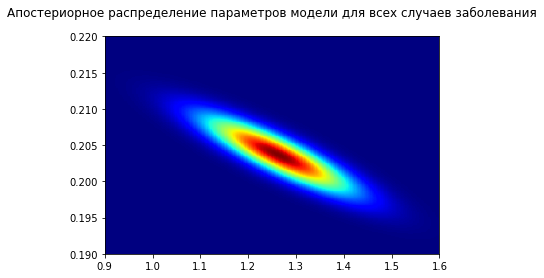

In [226]:
plot_colormesh(rv, x1=0.9, x2=1.6, y1=0.19, y2=0.22, nx=250, ny=250)
plt.title('Апостериорное распределение параметров модели для всех случаев заболевания', pad=20);

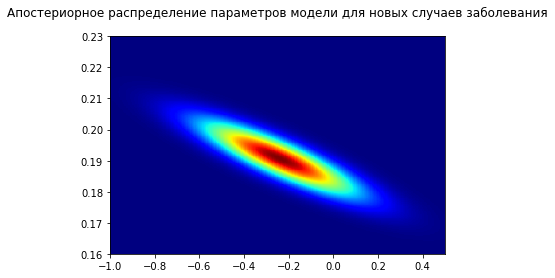

In [227]:
plot_colormesh(rv_new_cases_model_params, x1=-1, x2=0.5, y1=0.16, y2=0.23)
plt.title('Апостериорное распределение параметров модели для новых случаев заболевания', pad=20);

### c)

Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

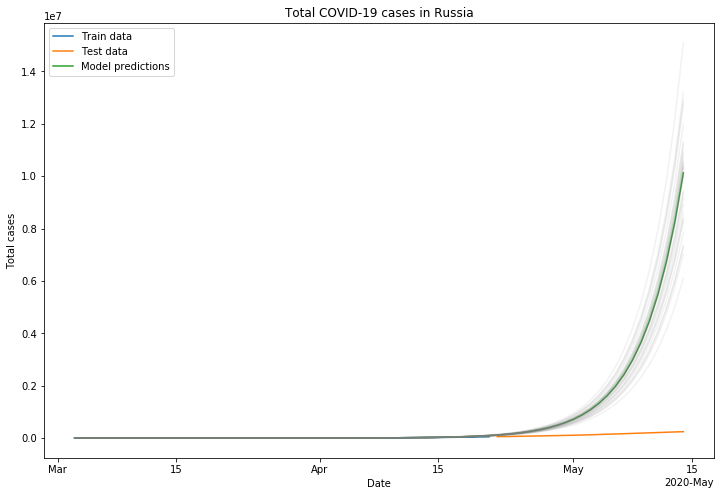

In [228]:
fig, ax = plt.subplots(figsize=FIGSIZE)

locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot('date', 'total_cases', data=train_df, label='Train data')
ax.plot('date', 'total_cases', data=test_df, label='Test data')

ax.plot(
    full_df['date'],
    np.exp(bayes_lin_reg_total_cases.predict(full_df[['day']].values)),
    label='Model predictions'
)

for i in range(30):
    ax.plot(
        full_df['date'],
        np.exp(bayes_lin_reg_total_cases.predict(full_df[['day']].values, sample_weights=True)),
        alpha=0.1,
        color='gray'
    )

ax.set_xlabel('Date')
ax.set_ylabel('Total cases')
ax.legend()
ax.set_title('Total COVID-19 cases in Russia')

plt.show()

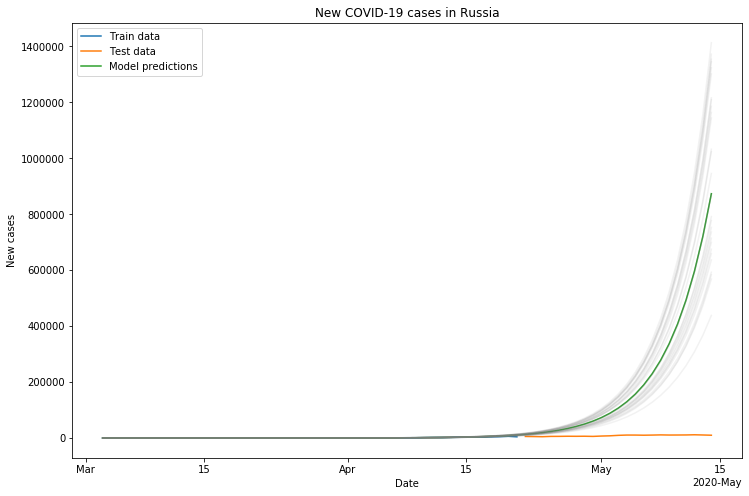

In [229]:
fig, ax = plt.subplots(figsize=FIGSIZE)

locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.plot('date', 'new_cases', data=train_df, label='Train data')
ax.plot('date', 'new_cases', data=test_df, label='Test data')

ax.plot(
    full_df['date'],
    np.exp(bayes_lin_reg_new_cases.predict(full_df[['day']].values)),
    label='Model predictions'
)

for i in range(30):
    ax.plot(
        full_df['date'],
        np.exp(bayes_lin_reg_new_cases.predict(full_df[['day']].values, sample_weights=True)),
        alpha=0.1,
        color='gray'
    )

ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend()

ax.set_title('New COVID-19 cases in Russia')
plt.show()

Посчитаем сколько дней до 1 мая, 1 июня и 1 сентября:

In [230]:
pd.to_datetime('2020-05-01') - pd.to_datetime('2020-03-02')

Timedelta('60 days 00:00:00')

In [231]:
pd.to_datetime('2020-06-01') - pd.to_datetime('2020-03-02')

Timedelta('91 days 00:00:00')

In [232]:
pd.to_datetime('2020-09-01') - pd.to_datetime('2020-03-02')

Timedelta('183 days 00:00:00')

Построим предсказательные распределения:

Среднее значение предсказаний всех случаев заболевания на 1 мая: 722682


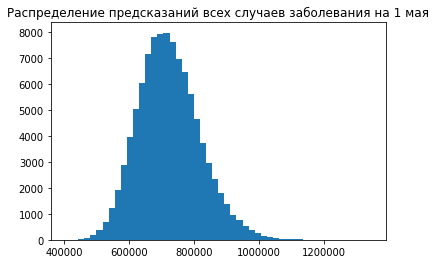

In [286]:
preds = np.exp(bayes_lin_reg_total_cases.predict(
    np.array([[60]]),
    sample_weights=True,
    n_samples=100000
).flatten())

plt.hist(
    preds,
    bins=50
)

plt.title('Распределение предсказаний всех случаев заболевания на 1 мая');
print('Среднее значение предсказаний всех случаев заболевания на 1 мая:', int(preds.mean()))

Среднее значение предсказаний всех случаев заболевания на 1 июня: 407625502


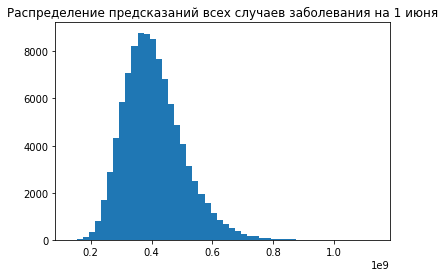

In [287]:
preds = np.exp(bayes_lin_reg_total_cases.predict(
    np.array([[91]]),
    sample_weights=True,
    n_samples=100000
).flatten())

plt.hist(
    preds,
    bins=50
)

plt.title('Распределение предсказаний всех случаев заболевания на 1 июня');
print('Среднее значение предсказаний всех случаев заболевания на 1 июня:', int(preds.mean()))

Среднее значение предсказаний всех случаев заболевания на 1 сентября: 63535991957622944


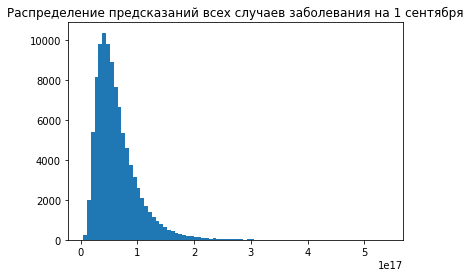

In [295]:
preds = np.exp(bayes_lin_reg_total_cases.predict(
    np.array([[183]]),
    sample_weights=True,
    n_samples=100000
).flatten())

plt.hist(
    preds,
    bins=80
)

plt.title('Распределение предсказаний всех случаев заболевания на 1 сентября');
print('Среднее значение предсказаний всех случаев заболевания на 1 сентября:', int(preds.mean()))

Среднее значение предсказаний новых случаев заболевания на 1 мая: 76609


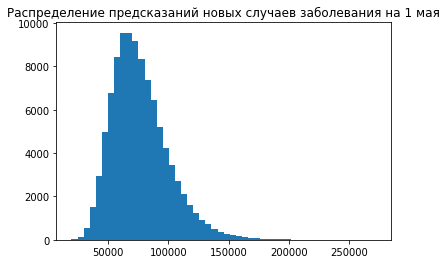

In [296]:
preds = np.exp(bayes_lin_reg_new_cases.predict(
    np.array([[60]]),
    sample_weights=True,
    n_samples=100000
).flatten())

plt.hist(
    preds,
    bins=50
)

plt.title('Распределение предсказаний новых случаев заболевания на 1 мая');
print('Среднее значение предсказаний новых случаев заболевания на 1 мая:', int(preds.mean()))

Среднее значение предсказаний новых случаев заболевания на 1 июня: 31215230


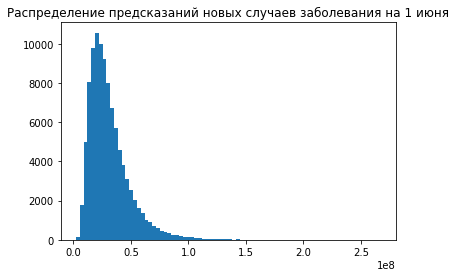

In [297]:
preds = np.exp(bayes_lin_reg_new_cases.predict(
    np.array([[91]]),
    sample_weights=True,
    n_samples=100000
).flatten())

plt.hist(
    preds,
    bins=80
)

plt.title('Распределение предсказаний новых случаев заболевания на 1 июня');
print('Среднее значение предсказаний новых случаев заболевания на 1 июня:', int(preds.mean()))

Среднее значение предсказаний новых случаев заболевания на 1 сентября: 2512873391261279


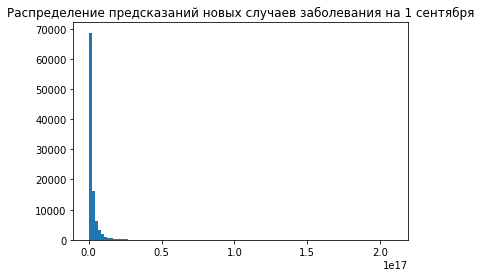

In [308]:
preds = np.exp(bayes_lin_reg_new_cases.predict(
    np.array([[183]]),
    sample_weights=True,
    n_samples=100000
).flatten())

plt.hist(
    preds,
    bins=100
)

plt.title('Распределение предсказаний новых случаев заболевания на 1 сентября');
print('Среднее значение предсказаний новых случаев заболевания на 1 сентября:', int(preds.mean()))

На 1 мая модель в среднем предсказывает 722682 заболевших и 76609 новых случаев. На 1 июня и 1 сентября предсказания далеки от реальности: получаются совсем астрономические числа.